<a href="https://colab.research.google.com/github/Darlan-Freire/APS2/blob/main/APS2_METODOS_NUMERICOS_COMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#APS2

####DISCIPLINA: METODOS NUMERICOS COMPUTACIONAIS
####PROFESSOR: SERGIO ASSUNCAO MONTEIRO
####TURMA: 145R
####CURSO: CIENCIA DA COMPUTACAO
####NOME: DARLAN FREIRE MENDONCA DA SILVA
####MATRÍCULA: 2017102635


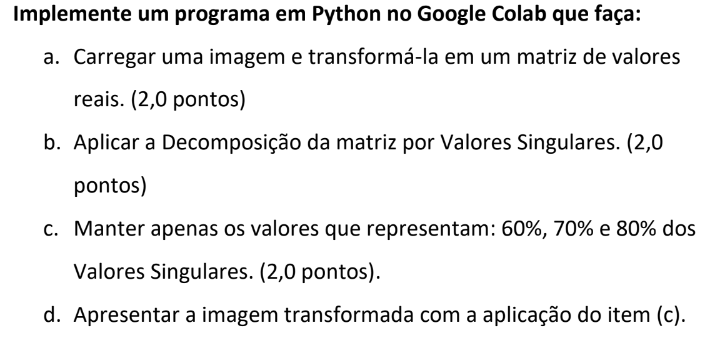

#(A) Carregar uma imagem e transformá-la em uma matriz de valores reais.

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
from skimage import io
from google.colab.patches import cv2_imshow
from numpy.linalg import svd
from PIL import Image
from numpy import asarray

In [ ]:
url_origem = "https://i.pinimg.com/736x/8f/99/8a/8f998ac82f60b62fc1c3267f03d6e157.jpg"
image = io.imread(url_origem) 
array_image_original = asarray(image)

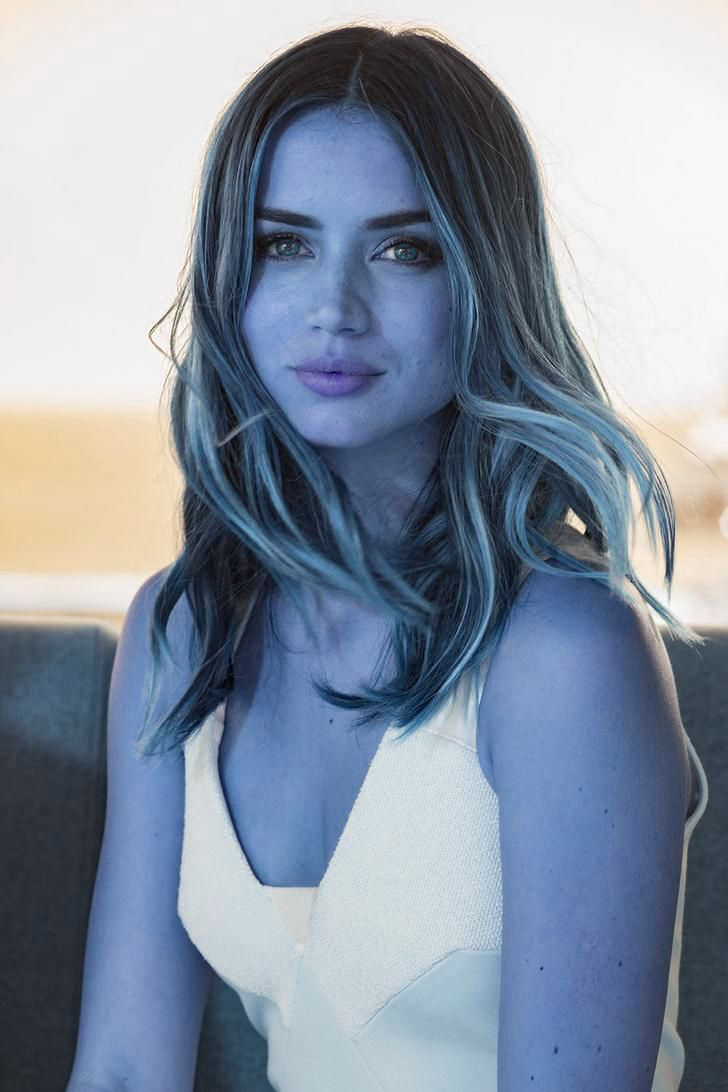

In [ ]:
cv2_imshow(image)

In [ ]:
print(array_image_original) # Transforma a imagem em array e logo depois mostra a saida de dados

[[[211 228 246]
  [212 229 247]
  [212 229 247]
  ...
  [223 233 245]
  [223 233 245]
  [223 233 245]]

 [[212 229 247]
  [212 229 247]
  [212 229 247]
  ...
  [223 233 245]
  [223 233 245]
  [223 233 245]]

 [[212 229 247]
  [212 229 247]
  [212 229 247]
  ...
  [224 234 246]
  [223 233 245]
  [223 233 245]]

 ...

 [[ 44  39  35]
  [ 44  39  35]
  [ 45  40  36]
  ...
  [ 67  58  49]
  [ 67  58  49]
  [ 67  58  49]]

 [[ 43  38  34]
  [ 43  38  34]
  [ 43  38  34]
  ...
  [ 65  56  47]
  [ 65  56  47]
  [ 65  56  47]]

 [[ 41  36  32]
  [ 42  37  33]
  [ 42  37  33]
  ...
  [ 63  54  45]
  [ 62  53  44]
  [ 62  53  44]]]


#(B) Aplicar a Decomposição da matriz por Valores Singulares.

###SVD - Decomposição por valores singulares


In [ ]:
# matriz de entrada
X = np.array(array_image_original)
# SVD
U, Singular, V = svd(X)
print("-------------------------------")
print("U: ",U)
print("-------------------------------")
print("Valores Singulares:", Singular)
print("-------------------------------")
print("V^{T}",V.T)
print("-------------------------------")

-------------------------------
U:  [[[-3.57350663e-02  1.25629066e-01 -2.70251473e-02 ... -4.00667566e-02
   -4.00667566e-02 -4.00667566e-02]
  [-3.58914741e-02  1.25526830e-01 -2.69603317e-02 ... -5.56280899e-02
   -5.56280899e-02 -5.56280899e-02]
  [-3.58914741e-02  1.25526830e-01 -2.69603317e-02 ... -5.43463862e-02
   -5.43463862e-02 -5.43463862e-02]
  ...
  [-3.65611167e-02  6.96905306e-02 -3.86258752e-02 ...  9.93683606e-01
   -6.31639392e-03 -6.31639392e-03]
  [-3.65611167e-02  6.96905306e-02 -3.86258752e-02 ... -6.31639392e-03
    9.93683606e-01 -6.31639392e-03]
  [-3.65611167e-02  6.96905306e-02 -3.86258752e-02 ... -6.31639392e-03
   -6.31639392e-03  9.93683606e-01]]

 [[-3.58921454e-02  1.25536756e-01 -2.69727643e-02 ... -4.00609887e-02
   -4.00609887e-02 -4.00609887e-02]
  [-3.58921454e-02  1.25536756e-01 -2.69727643e-02 ... -5.56298348e-02
   -5.56298348e-02 -5.56298348e-02]
  [-3.58921454e-02  1.25536756e-01 -2.69727643e-02 ... -5.43562442e-02
   -5.43562442e-02 -5.4356244

#(C) Manter apenas os valores que representam: 60%, 70% e 80% dos Valores Singulares.

###Função para compressão de imagem usando valores singulares.

In [ ]:
def compress_image(img_name, img, k):
    
    # print("processing...")
    # splitting the array into three 2D array (svd only apply on 2D array)
    r = img[:, :, 0]  # array for R
    g = img[:, :, 1]  # array for G
    b = img[:, :, 2]  # array for B

    # print("compressing...")

    # Calculating the svd components for all three arrays
    ur, sr, vr = svd(r, full_matrices=False)
    ug, sg, vg = svd(g, full_matrices=False)
    ub, sb, vb = svd(b, full_matrices=False)

    # print('dimensões do canal r: {}'.format(r.shape))

    # Forming the compress image with reduced information
    # We are selecting only k singular values for each array to make image which will exclude some information from the
    # image while image will be of same dimension

    # ur (mxk), diag(sr) (kxk) and vr (kxn) if image is off (mxn)
    # so let suppose we only selecting the k1 singular value from diag(sr) to form image

    rr = np.dot(ur[:, :k], np.dot(np.diag(sr[:k]), vr[:k, :]))
    rg = np.dot(ug[:, :k], np.dot(np.diag(sg[:k]), vg[:k, :]))
    rb = np.dot(ub[:, :k], np.dot(np.diag(sb[:k]), vb[:k, :]))

    # print("arranging...")

    # Creating a array of zeroes; shape will be same as of image matrix
    rimg = np.zeros(img.shape)

    # Adding matrix for R, G & B in created array
    rimg[:, :, 0] = rr
    rimg[:, :, 1] = rg
    rimg[:, :, 2] = rb

    # It will check if any value will be less than 0 will be converted to its absolute
    # and, if any value is greater than 255 than it will be converted to 255
    # because in image array of unit8 can only have value between 0 & 255
    for ind1, row in enumerate(rimg):
        for ind2, col in enumerate(row):
            for ind3, value in enumerate(col):
                if value < 0:
                    rimg[ind1, ind2, ind3] = abs(value)
                if value > 255:
                    rimg[ind1, ind2, ind3] = 255

    # converting the compress image array to uint8 type for further conversion into image object
    compressed_image = rimg.astype(np.uint8)

    # Showing the compressed image in graph
    plt.title("Image Name - figura compactada: " + img_name + "\n")
    plt.imshow(compressed_image)
    plt.axis('off')
    plt.show()
    cv2.imwrite("Imagem/comp-" + str(img_name) + ".jpg", compressed_image)

    # Uncomment below code if you want to save your compressed image to the file
    # compressed_image = Image.fromarray(compressed_image)
    # compressed_image.save("image_name.jpg")

In [ ]:
k = [60, 70, 80] #Array que representa apenas os valores 60%, 70%, 80% dos valores singulares.

#(D) Apresentar a imagem transformada com a aplicação do item (C).

Imagem está com K no valor: 60%



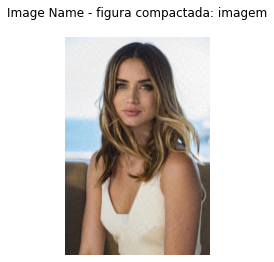



Imagem está com K no valor: 70%



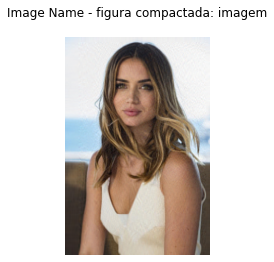



Imagem está com K no valor: 80%



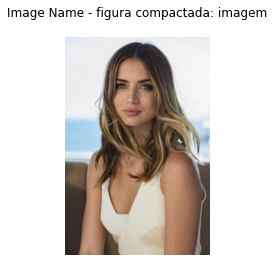

In [ ]:
for x in range(len(k)):
  print(f'Imagem está com K no valor: {k[x]}%\n')
  compress_image("imagem", image, k[x])
  print('\n')